# Test of different models

## Logistic regression

In [3]:
# Import des bibliothèques nécessaires
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Chargement des données (adaptez le chemin selon votre fichier)
# Exemple pour les données de prévalence COPD
df = pd.read_csv('../exploratory_data_analysis/data/Refined/1721/COPD_prevalence.csv')

# Affichage des premières lignes pour vérifier les noms de colonnes
print("Aperçu des données :")
print(df.head())
print("\nNoms des colonnes :")
print(df.columns.tolist())
print("\nTypes de données :")
print(df.dtypes)

Aperçu des données :
      Measure Country Name                                Disease Metric  \
0  Prevalence    Indonesia  Chronic obstructive pulmonary disease   Rate   
1  Prevalence    Indonesia  Chronic obstructive pulmonary disease   Rate   
2  Prevalence    Indonesia  Chronic obstructive pulmonary disease   Rate   
3  Prevalence    Indonesia  Chronic obstructive pulmonary disease   Rate   
4  Prevalence    Indonesia  Chronic obstructive pulmonary disease   Rate   

   Year        Value Country Code  \
0  2015  1588.006576          IDN   
1  2015  1588.006576          IDN   
2  2015  1588.006576          IDN   
3  2017  1646.266156          IDN   
4  2018  1680.660819          IDN   

  Access to clean fuels and technologies for cooking (% of population)  \
0                                               67.3                     
1                                               67.3                     
2                                               67.3                     
3  

In [4]:
# Étape 1 : Tri des données par Location et Period
# Assurez-vous d'adapter les noms de colonnes selon votre DataFrame
# (Location ou Country, Period ou Year)

# Supposons que les colonnes sont 'Location' et 'Period'
# Si vos colonnes ont d'autres noms, modifiez-les ici
location_col = 'Country Name'  # ou 'Country'
period_col = 'Year'      # ou 'Year'
value_col = 'Value'        # Colonne contenant le taux

# Vérifier que les colonnes existent
if location_col not in df.columns or period_col not in df.columns or value_col not in df.columns:
    print("⚠️ Attention : Veuillez vérifier les noms de colonnes !")
    print(f"Colonnes disponibles : {df.columns.tolist()}")
else:
    # Tri des données
    df = df.sort_values([location_col, period_col]).reset_index(drop=True)
    print(f"✓ Données triées par {location_col} puis {period_col}")
    print(f"Nombre de lignes : {len(df)}")
    print(f"Nombre de pays/régions : {df[location_col].nunique()}")
    print(f"Période : {df[period_col].min()} - {df[period_col].max()}")

✓ Données triées par Country Name puis Year
Nombre de lignes : 1131
Nombre de pays/régions : 47
Période : 2010 - 2021


In [5]:
# Étape 2 : Calcul de la différence par rapport à l'année précédente
# La méthode groupby().diff() calcule automatiquement la différence
# avec la ligne précédente au sein de chaque groupe

df['value_diff'] = df.groupby(location_col)[value_col].diff()

print("✓ Colonne 'value_diff' créée")
print(f"\nExemple pour un pays (les 10 premières lignes) :")
print(df[[location_col, period_col, value_col, 'value_diff']].head(10))

✓ Colonne 'value_diff' créée

Exemple pour un pays (les 10 premières lignes) :
  Country Name  Year        Value  value_diff
0      Albania  2015  3263.566286         NaN
1      Albania  2016  3415.349428  151.783142
2      Albania  2017  3561.038801  145.689373
3      Albania  2018  3619.240209   58.201408
4      Albania  2019  3732.947927  113.707717
5      Albania  2020  3946.051306  213.103380
6    Australia  2012  3367.843421         NaN
7    Australia  2013  3353.098308  -14.745113
8    Australia  2013  3353.098308    0.000000
9    Australia  2013  3353.098308    0.000000


In [6]:
# Étape 3 : Création de la variable cible Y
# Si value_diff > 0 : "Augmente" (ou 1)
# Si value_diff <= 0 : "Diminue" (ou 0)

# Version avec labels textuels
df['Y_label'] = df['value_diff'].apply(
    lambda x: 'Augmente' if x > 0 else ('Diminue' if pd.notna(x) else np.nan)
)

# Version avec valeurs binaires (0/1) - plus utile pour le ML
df['Y'] = df['value_diff'].apply(
    lambda x: 1 if x > 0 else (0 if pd.notna(x) else np.nan)
)

print("✓ Variables cibles 'Y' et 'Y_label' créées")
print(f"\nNombre de valeurs NaN dans Y : {df['Y'].isna().sum()}")
print(f"Nombre total de lignes : {len(df)}")

✓ Variables cibles 'Y' et 'Y_label' créées

Nombre de valeurs NaN dans Y : 47
Nombre total de lignes : 1131


In [7]:
# Étape 4 : Gestion des valeurs NaN
# Suppression des lignes où Y est NaN (première année de chaque pays)

print("Avant suppression des NaN :")
print(f"  Nombre total de lignes : {len(df)}")
print(f"  Nombre de NaN dans Y : {df['Y'].isna().sum()}")

# Création d'un nouveau DataFrame sans les NaN
df_clean = df.dropna(subset=['Y']).copy()

print("\nAprès suppression des NaN :")
print(f"  Nombre total de lignes : {len(df_clean)}")
print(f"  Nombre de NaN dans Y : {df_clean['Y'].isna().sum()}")

# Conversion de Y en entier
df_clean['Y'] = df_clean['Y'].astype(int)

print("\n✓ Données nettoyées et prêtes pour le Machine Learning")

Avant suppression des NaN :
  Nombre total de lignes : 1131
  Nombre de NaN dans Y : 47

Après suppression des NaN :
  Nombre total de lignes : 1084
  Nombre de NaN dans Y : 0

✓ Données nettoyées et prêtes pour le Machine Learning


In [8]:
# Étape 5 : Affichage de la distribution de la variable cible Y

print("="*60)
print("DISTRIBUTION DE LA VARIABLE CIBLE Y")
print("="*60)

# Comptes absolus
print("\n1. Comptes (value_counts) :")
print(df_clean['Y'].value_counts().sort_index())

# Pourcentages
print("\n2. Pourcentages :")
distribution_pct = df_clean['Y'].value_counts(normalize=True) * 100
print(distribution_pct.sort_index())

# Avec les labels
print("\n3. Distribution avec labels :")
print(df_clean['Y_label'].value_counts())

# Statistiques de déséquilibre
print("\n4. Analyse du déséquilibre des classes :")
counts = df_clean['Y'].value_counts()
if len(counts) == 2:
    ratio = max(counts) / min(counts)
    print(f"   Ratio de déséquilibre : {ratio:.2f}:1")
    if ratio < 1.5:
        print("   ✓ Classes bien équilibrées")
    elif ratio < 3:
        print("   ⚠️ Léger déséquilibre")
    else:
        print("   ⚠️ Déséquilibre important - envisager SMOTE ou pondération")

DISTRIBUTION DE LA VARIABLE CIBLE Y

1. Comptes (value_counts) :
Y
0    832
1    252
Name: count, dtype: int64

2. Pourcentages :
Y
0    76.752768
1    23.247232
Name: proportion, dtype: float64

3. Distribution avec labels :
Y_label
Diminue     832
Augmente    252
Name: count, dtype: int64

4. Analyse du déséquilibre des classes :
   Ratio de déséquilibre : 3.30:1
   ⚠️ Déséquilibre important - envisager SMOTE ou pondération


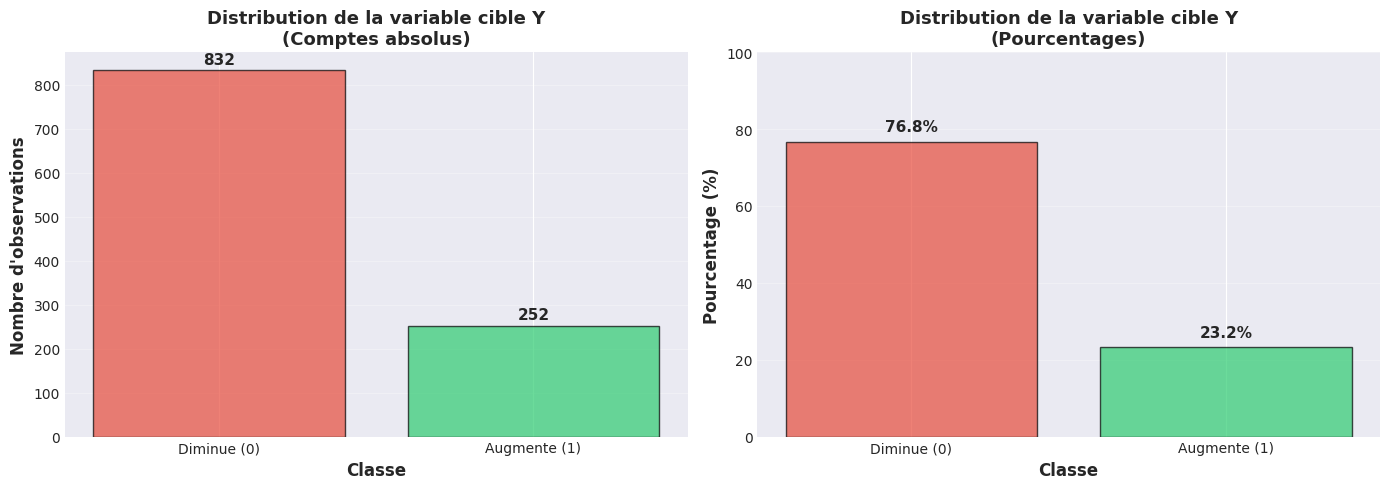


✓ Visualisation créée avec succès !


In [9]:
# Étape 6 : Visualisation de la distribution

# Configuration du style
plt.style.use('seaborn-v0_8-darkgrid')
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Graphique 1 : Bar plot simple
counts = df_clean['Y'].value_counts().sort_index()
colors = ['#e74c3c', '#2ecc71']  # Rouge pour "Diminue", Vert pour "Augmente"
axes[0].bar(counts.index, counts.values, color=colors, alpha=0.7, edgecolor='black')
axes[0].set_xlabel('Classe', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Nombre d\'observations', fontsize=12, fontweight='bold')
axes[0].set_title('Distribution de la variable cible Y\n(Comptes absolus)', 
                   fontsize=13, fontweight='bold')
axes[0].set_xticks([0, 1])
axes[0].set_xticklabels(['Diminue (0)', 'Augmente (1)'])
axes[0].grid(axis='y', alpha=0.3)

# Ajout des valeurs au-dessus des barres
for i, v in enumerate(counts.values):
    axes[0].text(i, v + max(counts.values)*0.01, str(v), 
                ha='center', va='bottom', fontweight='bold', fontsize=11)

# Graphique 2 : Pourcentages
pct = df_clean['Y'].value_counts(normalize=True).sort_index() * 100
axes[1].bar(pct.index, pct.values, color=colors, alpha=0.7, edgecolor='black')
axes[1].set_xlabel('Classe', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Pourcentage (%)', fontsize=12, fontweight='bold')
axes[1].set_title('Distribution de la variable cible Y\n(Pourcentages)', 
                  fontsize=13, fontweight='bold')
axes[1].set_xticks([0, 1])
axes[1].set_xticklabels(['Diminue (0)', 'Augmente (1)'])
axes[1].set_ylim([0, 100])
axes[1].grid(axis='y', alpha=0.3)

# Ajout des pourcentages au-dessus des barres
for i, v in enumerate(pct.values):
    axes[1].text(i, v + 2, f'{v:.1f}%', 
                ha='center', va='bottom', fontweight='bold', fontsize=11)

plt.tight_layout()
plt.show()

print("\n✓ Visualisation créée avec succès !")

## Vérification et exploration supplémentaire

Quelques vérifications utiles avant de passer à la modélisation :

In [10]:
# Vérification : Afficher quelques exemples pour chaque pays
print("Exemples de données avec la variable cible Y :\n")

# Sélectionner quelques pays pour l'illustration
sample_locations = df_clean[location_col].unique()[:3]

for loc in sample_locations:
    print(f"\n{'='*60}")
    print(f"Pays/Région : {loc}")
    print('='*60)
    sample_data = df_clean[df_clean[location_col] == loc][[
        location_col, period_col, value_col, 'value_diff', 'Y', 'Y_label'
    ]].head(10)
    print(sample_data.to_string(index=False))
    print()

Exemples de données avec la variable cible Y :


Pays/Région : Albania
Country Name  Year       Value  value_diff  Y  Y_label
     Albania  2016 3415.349428  151.783142  1 Augmente
     Albania  2017 3561.038801  145.689373  1 Augmente
     Albania  2018 3619.240209   58.201408  1 Augmente
     Albania  2019 3732.947927  113.707717  1 Augmente
     Albania  2020 3946.051306  213.103380  1 Augmente


Pays/Région : Australia
Country Name  Year       Value  value_diff  Y  Y_label
   Australia  2013 3353.098308  -14.745113  0  Diminue
   Australia  2013 3353.098308    0.000000  0  Diminue
   Australia  2013 3353.098308    0.000000  0  Diminue
   Australia  2013 3353.098308    0.000000  0  Diminue
   Australia  2013 3353.098308    0.000000  0  Diminue
   Australia  2013 3353.098308    0.000000  0  Diminue
   Australia  2014 3361.027233    7.928924  1 Augmente
   Australia  2015 3379.711188   18.683955  1 Augmente
   Australia  2016 3403.269497   23.558309  1 Augmente
   Australia  2016 3403

Statistiques de la variable 'value_diff' :
count    1084.000000
mean       11.018564
std        30.264933
min      -129.763283
25%         0.000000
50%         0.000000
75%         0.000000
max       284.641669
Name: value_diff, dtype: float64


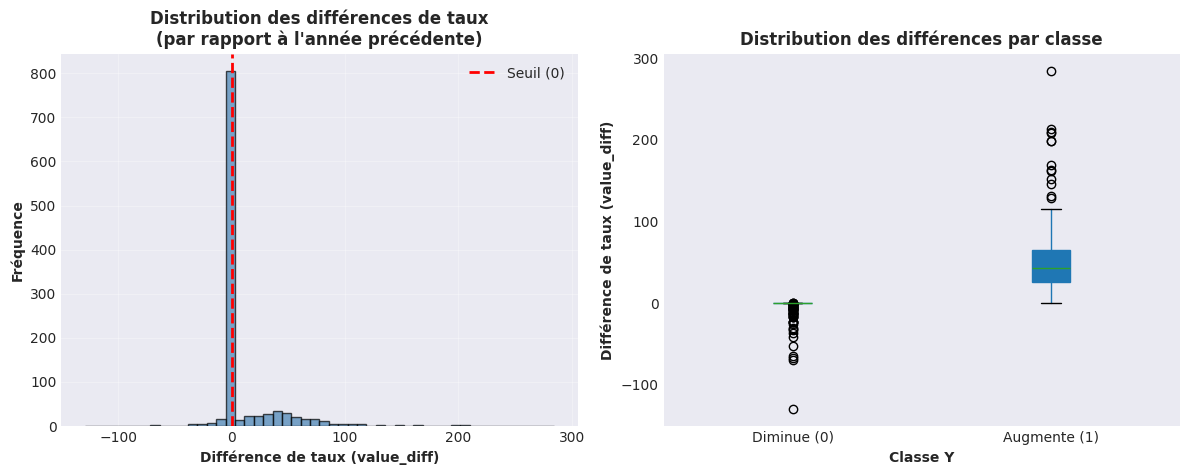

In [11]:
# Statistiques descriptives de la différence value_diff
print("Statistiques de la variable 'value_diff' :")
print(df_clean['value_diff'].describe())

# Distribution de value_diff
plt.figure(figsize=(12, 5))

# Histogramme
plt.subplot(1, 2, 1)
plt.hist(df_clean['value_diff'], bins=50, color='steelblue', alpha=0.7, edgecolor='black')
plt.axvline(x=0, color='red', linestyle='--', linewidth=2, label='Seuil (0)')
plt.xlabel('Différence de taux (value_diff)', fontweight='bold')
plt.ylabel('Fréquence', fontweight='bold')
plt.title('Distribution des différences de taux\n(par rapport à l\'année précédente)', 
          fontweight='bold')
plt.legend()
plt.grid(alpha=0.3)

# Boxplot
plt.subplot(1, 2, 2)
df_clean.boxplot(column='value_diff', by='Y', ax=plt.gca(), 
                 patch_artist=True, grid=False)
plt.suptitle('')  # Supprimer le titre auto-généré
plt.xlabel('Classe Y', fontweight='bold')
plt.ylabel('Différence de taux (value_diff)', fontweight='bold')
plt.title('Distribution des différences par classe', fontweight='bold')
plt.xticks([1, 2], ['Diminue (0)', 'Augmente (1)'])

plt.tight_layout()
plt.show()

## Sauvegarde des données préparées

Le DataFrame `df_clean` est maintenant prêt pour la modélisation de Machine Learning.

In [12]:
# Sauvegarde optionnelle des données préparées
# df_clean.to_csv('COPD_prepared_for_classification.csv', index=False)
# print("✓ Données sauvegardées dans 'COPD_prepared_for_classification.csv'")

# Résumé final
print("\n" + "="*60)
print("RÉSUMÉ DE LA PRÉPARATION DES DONNÉES")
print("="*60)
print(f"DataFrame original (df) : {len(df)} lignes")
print(f"DataFrame nettoyé (df_clean) : {len(df_clean)} lignes")
print(f"Nombre de pays/régions : {df_clean[location_col].nunique()}")
print(f"Période couverte : {df_clean[period_col].min()} - {df_clean[period_col].max()}")
print(f"\nVariable cible 'Y' :")
print(f"  - 0 (Diminue) : {(df_clean['Y'] == 0).sum()} observations ({(df_clean['Y'] == 0).sum() / len(df_clean) * 100:.1f}%)")
print(f"  - 1 (Augmente) : {(df_clean['Y'] == 1).sum()} observations ({(df_clean['Y'] == 1).sum() / len(df_clean) * 100:.1f}%)")
print("\n✓ Les données sont prêtes pour l'entraînement de modèles de classification !")
print("="*60)


RÉSUMÉ DE LA PRÉPARATION DES DONNÉES
DataFrame original (df) : 1131 lignes
DataFrame nettoyé (df_clean) : 1084 lignes
Nombre de pays/régions : 44
Période couverte : 2010 - 2021

Variable cible 'Y' :
  - 0 (Diminue) : 832 observations (76.8%)
  - 1 (Augmente) : 252 observations (23.2%)

✓ Les données sont prêtes pour l'entraînement de modèles de classification !
